In [3]:
import pandas as pd
import numpy as np
heart_df=pd.read_csv('heart.csv')

In [4]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predicted
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [5]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps     object
chol         object
fbs          object
restecg       int64
thalach      object
exang        object
oldpeak      object
slope        object
ca           object
thal         object
predicted     int64
dtype: object

In [6]:
heart=heart_df.replace(to_replace='?',value='NaN')

In [7]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predicted
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0


In [9]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
list1=['chol','fbs','exang','oldpeak','slope','ca','thal','trestbps','thalach']
for val in list1:
    heart[val]=imp.fit_transform(heart[val].values.reshape(-1,1))

In [10]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predicted
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps     object
chol         object
fbs          object
restecg       int64
thalach      object
exang        object
oldpeak      object
slope        object
ca           object
thal         object
predicted     int64
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['trestbps','chol','fbs','thalach','exang','slope','ca','thal','oldpeak']
for val in list1:
    heart[val]=le.fit_transform(heart[val].astype(float))

In [16]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predicted
0,63,1,4,24,62,0,1,20,1,11,1,1,12,2
1,44,1,4,18,28,0,1,33,0,1,31,126,102,0
2,60,1,4,19,35,0,1,42,1,6,2,127,103,2
3,55,1,4,25,45,0,1,47,1,10,0,128,104,1
4,66,1,3,6,31,1,2,11,1,5,1,129,105,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,16,91,1,1,50,0,1,28,69,52,1
196,62,1,1,63,2,0,1,72,7,36,27,70,53,0
197,55,1,4,12,40,1,1,12,0,1,26,71,1,2
198,58,1,4,54,97,1,2,64,32,56,68,100,139,0


In [17]:
import seaborn as sns

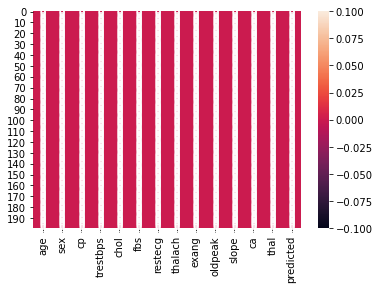

In [18]:
sns.heatmap(heart.isnull(),annot=True)

In [19]:
heart.skew()

age         -0.404091
sex         -5.552105
cp          -1.648734
trestbps     1.005419
chol         0.383570
fbs          4.423653
restecg      0.391463
thalach      0.682403
exang        1.885461
oldpeak      1.495948
slope        0.886043
ca           0.000508
thal         0.170664
predicted    0.297393
dtype: float64

In [20]:
for col in heart.columns:
    if heart.skew().loc[col]>0.55:
        heart[col]=np.log1p(heart[col])

In [21]:
heart.skew()

age         -0.404091
sex         -5.552105
cp          -1.648734
trestbps    -0.567478
chol         0.383570
fbs          1.612298
restecg      0.391463
thalach     -1.084600
exang        1.121482
oldpeak      0.156936
slope        0.144117
ca           0.000508
thal         0.170664
predicted    0.297393
dtype: float64

In [22]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predicted
age,1.000000,0.034230,-0.038280,0.143653,0.074986,0.052469,0.002400,-0.034932,0.049644,0.056929,-0.085772,-0.006573,-0.005632,0.287289
sex,0.034230,1.000000,0.038036,0.030554,-0.134444,-0.020594,0.060621,0.022938,0.027051,0.090180,-0.005353,0.045205,0.093793,0.147470
cp,-0.038280,0.038036,1.000000,-0.092808,0.104384,-0.044746,0.034790,-0.183200,-0.193796,-0.160859,-0.258612,-0.083375,-0.129678,0.168210
trestbps,0.143653,0.030554,-0.092808,1.000000,0.103156,0.056384,0.055209,0.485816,0.684846,0.603923,0.370955,-0.084535,-0.039391,0.101101
chol,0.074986,-0.134444,0.104384,0.103156,1.000000,0.021940,0.019100,0.060119,0.101872,0.138967,-0.014669,-0.248650,-0.088168,0.138953
fbs,0.052469,-0.020594,-0.044746,0.056384,0.021940,1.000000,0.108248,0.019356,-0.052118,-0.006435,-0.045200,0.110852,0.105215,0.055451
restecg,0.002400,0.060621,0.034790,0.055209,0.019100,0.108248,1.000000,0.041649,-0.011963,-0.025768,0.090991,-0.121237,-0.136998,-0.032800
thalach,-0.034932,0.022938,-0.183200,0.485816,0.060119,0.019356,0.041649,1.000000,0.611910,0.619271,0.241961,-0.085172,0.043891,-0.077407
exang,0.049644,0.027051,-0.193796,0.684846,0.101872,-0.052118,-0.011963,0.611910,1.000000,0.765343,0.476190,-0.110976,0.025005,-0.033365
oldpeak,0.056929,0.090180,-0.160859,0.603923,0.138967,-0.006435,-0.025768,0.619271,0.765343,1.000000,0.173579,-0.084608,0.073056,0.098478


In [23]:
import matplotlib.pyplot as plt

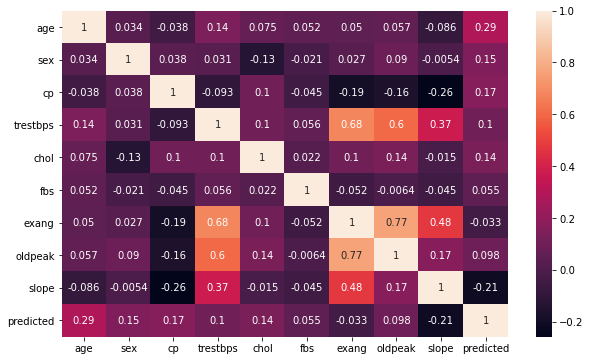

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(heart.corr(),annot=True)

In [25]:
heart=heart.drop(['thalach','thal','ca','restecg'],axis=1)

In [26]:
col=heart.columns.values
ncol=5
nrow=5

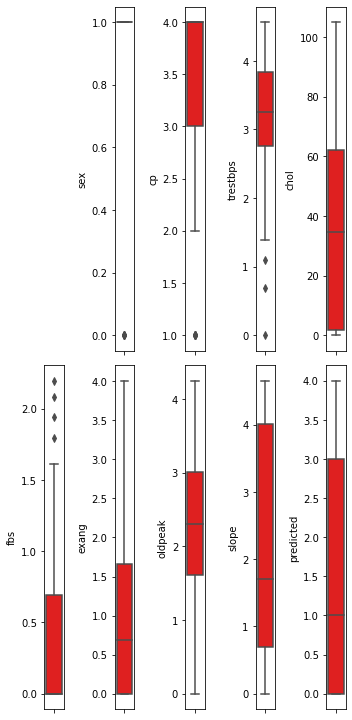

In [29]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(col)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(heart[col[i]],color='red',orient='v')
    plt.tight_layout()

In [30]:
from scipy.stats import zscore
z_score=abs(zscore(heart))
print(heart.shape)
hea=heart.loc[(z_score<3).all(axis=1)]
print(hea.shape)

(200, 10)
(178, 10)


In [31]:
hea

,age,sex,cp,trestbps,chol,fbs,exang,oldpeak,slope,predicted
0,63,1,4,3.218876,62,0.000000,0.693147,2.484907,0.693147,2
1,44,1,4,2.944439,28,0.000000,0.000000,0.693147,3.465736,0
2,60,1,4,2.995732,35,0.000000,0.693147,1.945910,1.098612,2
3,55,1,4,3.258097,45,0.000000,0.693147,2.397895,0.000000,1
4,66,1,3,1.945910,31,0.693147,0.693147,1.791759,0.693147,0
...,...,...,...,...,...,...,...,...,...,...
193,62,1,4,3.526361,9,0.000000,0.693147,0.693147,3.433987,1
194,46,1,4,3.044522,87,0.000000,0.000000,0.693147,3.401197,2
197,55,1,4,2.564949,40,0.693147,0.000000,0.693147,3.295837,2
198,58,1,4,4.007333,97,0.693147,3.496508,4.043051,4.234107,0


In [32]:
hea=pd.DataFrame(data=hea)

In [40]:
df_x=hea.drop(['predicted'],axis=1)

In [41]:
df_x

,age,sex,cp,trestbps,chol,fbs,exang,oldpeak,slope
0,63,1,4,3.218876,62,0.000000,0.693147,2.484907,0.693147
1,44,1,4,2.944439,28,0.000000,0.000000,0.693147,3.465736
2,60,1,4,2.995732,35,0.000000,0.693147,1.945910,1.098612
3,55,1,4,3.258097,45,0.000000,0.693147,2.397895,0.000000
4,66,1,3,1.945910,31,0.693147,0.693147,1.791759,0.693147
...,...,...,...,...,...,...,...,...,...
193,62,1,4,3.526361,9,0.000000,0.693147,0.693147,3.433987
194,46,1,4,3.044522,87,0.000000,0.000000,0.693147,3.401197
197,55,1,4,2.564949,40,0.693147,0.000000,0.693147,3.295837
198,58,1,4,4.007333,97,0.693147,3.496508,4.043051,4.234107


In [42]:
df_x.shape

(178, 9)

In [34]:
x

,sex,cp,trestbps,chol,fbs,exang,oldpeak,slope
0,1,4,3.218876,62,0.000000,0.693147,2.484907,0.693147
1,1,4,2.944439,28,0.000000,0.000000,0.693147,3.465736
2,1,4,2.995732,35,0.000000,0.693147,1.945910,1.098612
3,1,4,3.258097,45,0.000000,0.693147,2.397895,0.000000
4,1,3,1.945910,31,0.693147,0.693147,1.791759,0.693147
...,...,...,...,...,...,...,...,...
193,1,4,3.526361,9,0.000000,0.693147,0.693147,3.433987
194,1,4,3.044522,87,0.000000,0.000000,0.693147,3.401197
197,1,4,2.564949,40,0.693147,0.000000,0.693147,3.295837
198,1,4,4.007333,97,0.693147,3.496508,4.043051,4.234107


In [35]:
x.shape

(178, 8)

In [43]:
y=pd.DataFrame(hea['predicted'])

In [44]:
y

,predicted
0,2
1,0
2,2
3,1
4,0
...,...
193,1
194,2
197,2
198,0


In [45]:
y.shape

(178, 1)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
svc=svm.SVC()
parameters={'kernel':['linear','rbf','poly'],'C':[1.0]}
gd=GridSearchCV(svc,parameters)
gd.fit(x,y)
sorted(gd.cv_results_.keys())
print(gd.best_params_)


{'C': 1.0, 'kernel': 'linear'}


In [61]:
dtc=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy']}
gd=GridSearchCV(dtc,parameters)
gd.fit(x,y)
sorted(gd.cv_results_.keys())
print(gd.best_params_)

{'criterion': 'entropy'}


In [63]:
model=[DecisionTreeClassifier(criterion='gini'),KNeighborsClassifier(),SVC(kernel='rbf'),RandomForestClassifier(),AdaBoostClassifier()]
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=61,test_size=.20)
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('score:')
    print('accuracy_score:',accuracy_score(y_test,predm))
    print('confusion_matrix:',confusion_matrix(y_test,predm))
    print('classification_report:',classification_report(y_test,predm))
    print('************************************************************************************************************************************')
    print('\n')

score of DecisionTreeClassifier() is: 1.0
score:
accuracy_score: 0.3055555555555556
confusion_matrix: [[3 3 1 2 0]
 [0 3 6 1 0]
 [2 1 0 1 1]
 [2 3 0 5 0]
 [0 1 1 0 0]]
classification_report:               precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       0.27      0.30      0.29        10
           2       0.00      0.00      0.00         5
           3       0.56      0.50      0.53        10
           4       0.00      0.00      0.00         2

    accuracy                           0.31        36
   macro avg       0.25      0.23      0.24        36
weighted avg       0.34      0.31      0.32        36

************************************************************************************************************************************


score of KNeighborsClassifier() is: 0.4859154929577465
score:
accuracy_score: 0.3333333333333333
confusion_matrix: [[4 3 2 0 0]
 [0 5 4 1 0]
 [1 3 1 0 0]
 [3 3 2 2 0]
 [1 0 1 0 0]]
clas

In [65]:
import joblib
joblib.dump(DecisionTreeClassifier,'heart.pkl')

['heart.pkl']